# Predicting Factors Affecting Survival in the Titanic

## 1. Defining the Question

### a) Specifying the Question

Creating a model predicting survival of Titanic passengers

### b) Defining the metric for success


We aim to achieve an accuracy score of about 80%

### c) Understanding the context

What are the chances of a person surviving the titanic based on the various factors

### d) Recording the experimental design

* Data reading
* Data cleaning
* Exploratory data analysis
* Model creation and fitting

### e) Data Relevance

* Train Dataset link :[https://archive.org/download/train5_202002/train%20%285%29.csv]
* Test dataset link: [https://archive.org/download/test1_202002/test%20%281%29.csv]

## 2. Importing libraries and Viewing the dataset

In [1]:
#Importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math

In [2]:
#Loading the dataset
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
#Looking at the top of the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Viewing the test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Looking at the shape of the datasets
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


There are 12 variables and 891 records

In [6]:
#Confirming the dataset has the correct data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 3. Data Cleaning

In [8]:
#Checking for duplicates
train.duplicated().sum()

0

In [9]:
test.duplicated().sum()

0

There are no duplicate values in both the train and the test dataset.

In [10]:
#Dropping columns that we will not use
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [11]:
test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

We don't need the name of the passengers and the passenger Id is just the indexing of the passengers. We therefore drop those columns without using feature importance. They are not necessary to the study.

In [12]:
#Changing the format of the column names by lowering the strings
test.rename(columns= str.lower, inplace = True)
train.rename(columns= str.lower, inplace = True)

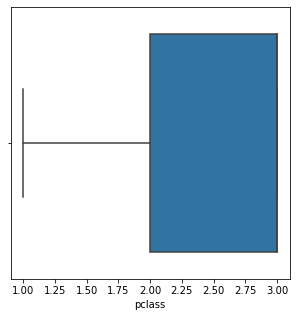

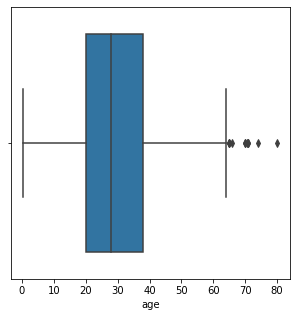

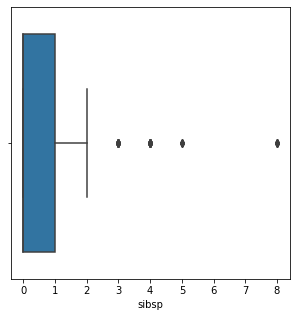

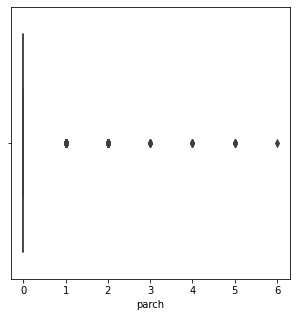

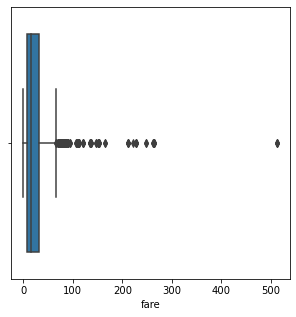

In [13]:
#Checking for outliers in the data
# Checking for Outliers

cols = train.drop(columns = ['sex', 'embarked', 'survived'])

for i in cols:
    fig = plt.figure(figsize = (5,5))
    sns.boxplot(train[i])
        
plt.show()

There is presence of some outliers. However, we will not drop them as they are real values and not due to an error. Further investigation on the outliers will be done when checking for anomalies.

In [14]:
#Checking for missing data
train.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [15]:
test.isna().sum()

pclass       0
sex          0
age         86
sibsp        0
parch        0
fare         1
embarked     0
dtype: int64

In [16]:
#Dealing with the missing data
#Filling the null values in the age column
test['age'].fillna(test['age'].mean(), inplace=True)

#For train
train['age'].fillna(train['age'].mean(), inplace=True)

In [17]:
#We will drop the two columns where embarked is null
#We will also drop the null values in the fare column for the test dataset. 
train.dropna(inplace=True)
test.dropna(inplace=True)

In [18]:
#Confirming the changes made
train.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [19]:
#Confirming for the test dataset
test.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [20]:
#Checking for anomalies
for i in cols:
    u = train[i].unique()
    print('Unique values of ', i , 'is' , u)

Unique values of  pclass is [3 1 2]
Unique values of  age is [22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.         36.5
 51.         55.5        40.5        44.          1.         61.
 56.         50.         36.         45.5        20.5        62.
 41.         52.         63.         23.5         0.92       43.
 60.         10.         64.         13.         48.          0.75
 53.         57.         80.         70.         24.5         6.
  0.67       30.5         

In [21]:
#Checking for anomalies
for i in cols:
    u = test[i].unique()
    print('Unique values of ', i , 'is' , u)

Unique values of  pclass is [3 2 1]
Unique values of  age is [34.5        47.         62.         27.         22.         14.
 30.         26.         18.         21.         30.27259036 46.
 23.         63.         24.         35.         45.         55.
  9.         48.         50.         22.5        41.         33.
 18.5        25.         39.         60.         36.         20.
 28.         10.         17.         32.         13.         31.
 29.         28.5        32.5         6.         67.         49.
  2.         76.         43.         16.          1.         12.
 42.         53.         26.5        40.         61.          7.
 15.         54.         64.         37.         34.         11.5
  8.          0.33       38.         57.         40.5         0.92
 19.         36.5         0.75        0.83       58.          0.17
 59.         14.5        44.          5.         51.          3.
 38.5       ]
Unique values of  sibsp is [0 1 2 3 4 5 8]
Unique values of  parch is [0 1 

There are no anomalies in the dataset

## 4. Exploratory Data Analysis

### 4.1 Univariate Analysis

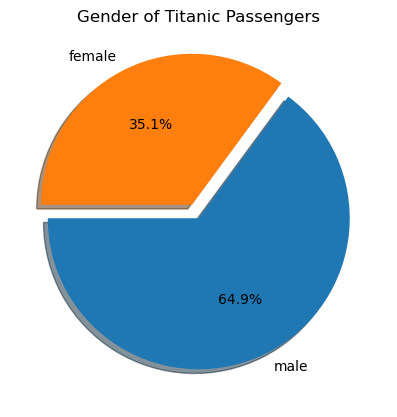

In [22]:
#Checking the gender of the people aboard the titanic
accounts = train['sex'].value_counts().head(4)
labels = accounts.index
values = accounts.values

plt.figure(figsize=(5,5), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0,0.1), shadow=True, startangle=180)
plt.title('Gender of Titanic Passengers', color='black')
plt.show()

Most passengers aboard the titanic were male

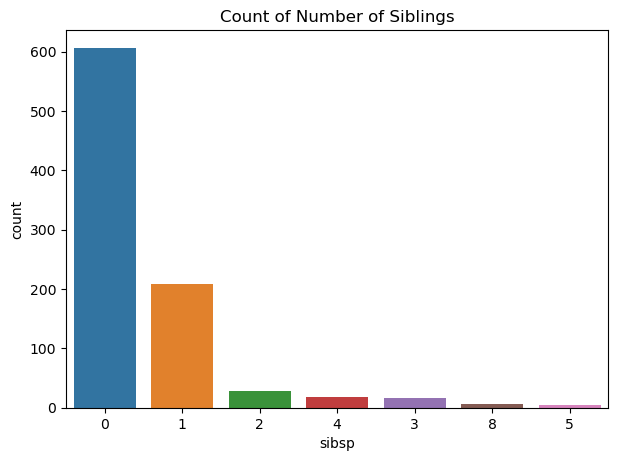

In [23]:
#Checking the number of siblings that people in the titanic had
plt.figure(dpi = 100, figsize = (7,5))
sns.countplot(train['sibsp'], order=train['sibsp'].value_counts().index)
plt.title("Count of Number of Siblings")
plt.show()

Most people didn't have a sibling on the titanic.

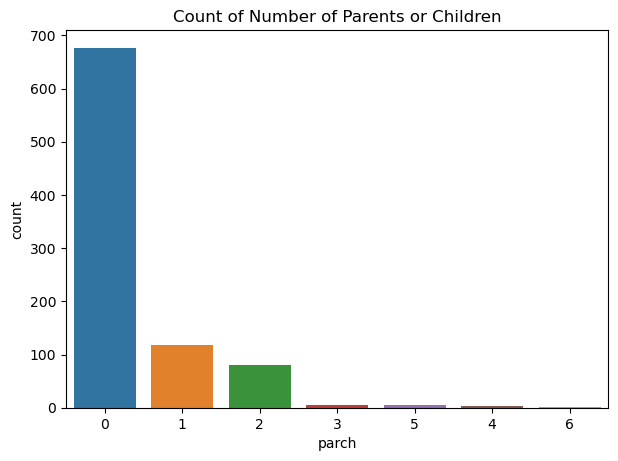

In [24]:
#Checking the number of parents or children that people in the titanic had
plt.figure(dpi = 100, figsize = (7,5))
sns.countplot(train['parch'], order=train['parch'].value_counts().index)
plt.title("Count of Number of Parents or Children")
plt.show()

Most people didn't have a parent or child

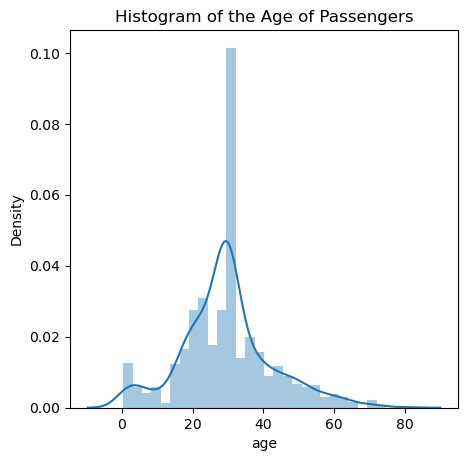

In [25]:
# Histogram of the age of passengers
plt.figure(dpi = 100, figsize = (5,5))
sns.distplot(train['age'])
plt.title("Histogram of the Age of Passengers")
plt.show()

Most passengers are between 20 and 40 years of age.

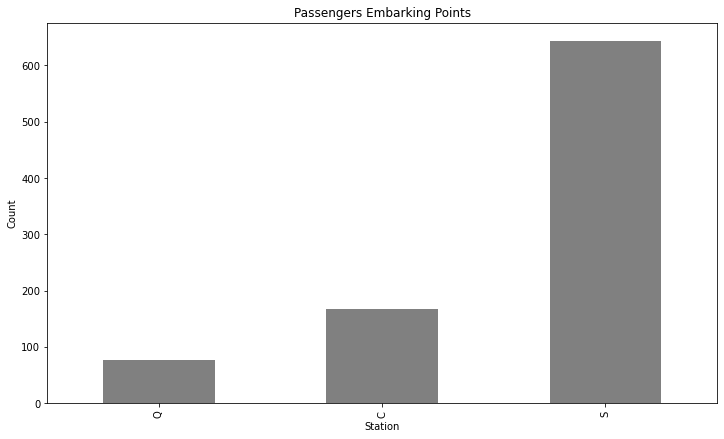

In [26]:
#Looking at the most famous place of embarking the titanic
plt.figure(figsize = (12,7))
train.groupby('embarked').size().sort_values(ascending = True).plot(kind='bar', color='grey')
plt.title('Passengers Embarking Points')
plt.ylabel('Count')
plt.xlabel('Station')
plt.show()

Most passengers embarked from Southampton

In [27]:
#A table showing the number of passengers who survived or not
train['survived'].value_counts()

0    549
1    340
Name: survived, dtype: int64

Most passengers did not survive

In [28]:
#Mean of the dataset
cols.mean()

pclass     2.308642
age       29.699118
sibsp      0.523008
parch      0.381594
fare      32.204208
dtype: float64

In [29]:
#Mode of the dataset
cols.mode()

,pclass,age,sibsp,parch,fare
0,3,24.0,0,0,8.05


In [30]:
#Median of the dataset
cols.median()

pclass     3.0000
age       28.0000
sibsp      0.0000
parch      0.0000
fare      14.4542
dtype: float64

In [31]:
#Upper and lower quantiles of the dataset
cols.quantile([0.25, 0.75])

,pclass,age,sibsp,parch,fare
0.25,2.0,20.125,0.0,0.0,7.9104
0.75,3.0,38.000,1.0,0.0,31.0000


In [32]:
#Standard deviation of the dataset
cols.std()

pclass     0.836071
age       14.526497
sibsp      1.102743
parch      0.806057
fare      49.693429
dtype: float64

Only age and fare have a high standard deviation

In [33]:
#Variance of the dataset
cols.var()

pclass       0.699015
age        211.019125
sibsp        1.216043
parch        0.649728
fare      2469.436846
dtype: float64

Only age and fare have a high variance

In [34]:
#Finding the skew of the dataset
cols.skew()

pclass   -0.630548
age       0.389108
sibsp     3.695352
parch     2.749117
fare      4.787317
dtype: float64

Our data is positively skewed apart from pclass

In [35]:
#Finding the kurtosis
cols.kurt()

pclass    -1.280015
age        0.178274
sibsp     17.880420
parch      9.778125
fare      33.398141
dtype: float64

There are extreme values in siblings and fare.

### 4.2 Bivariate Analysis

<Figure size 2000x2000 with 0 Axes>

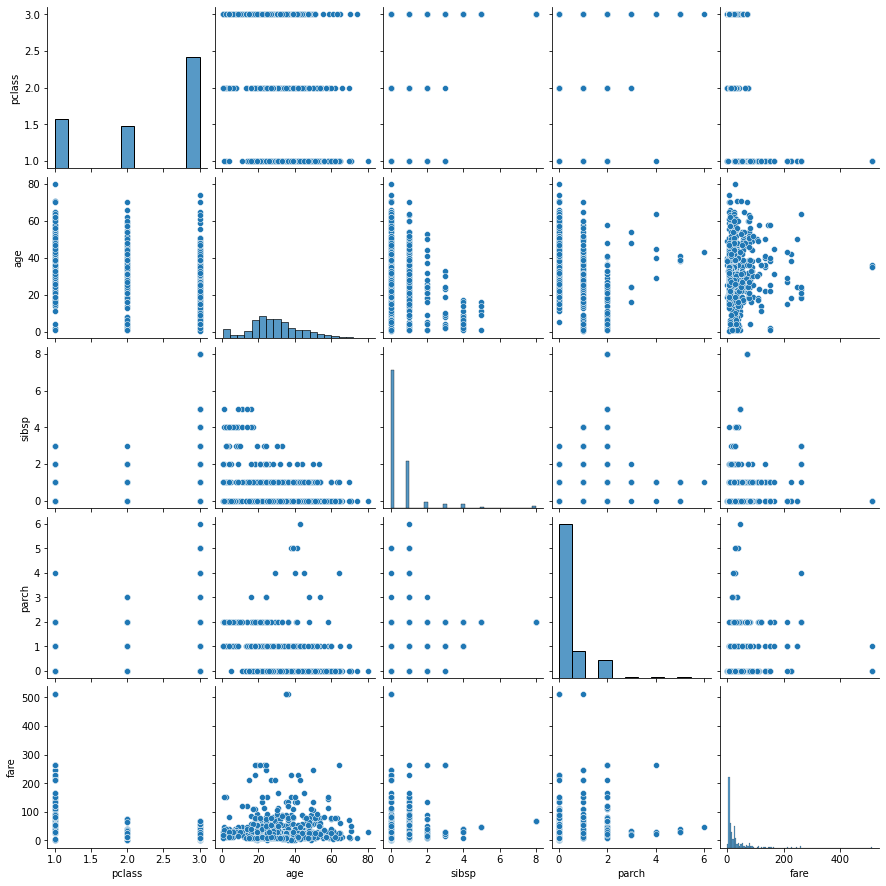

In [36]:
#Pairplot showing the relationship between the various colums
plt.figure(figsize = (20, 20), dpi=100)
sns.pairplot(cols)

<AxesSubplot:>

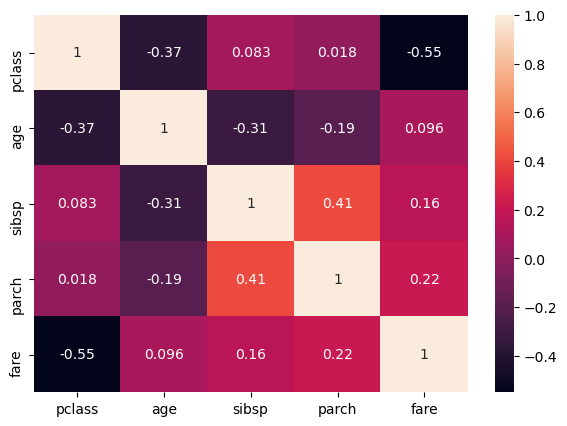

In [37]:
#Correlation
correlation = cols.corr()
fig, ax = plt.subplots(figsize=(7,5), dpi = 100)
sns.heatmap(correlation, annot=True)

* There is a strong relationship between parch and sibsp
* There is a fairly strong relationship between parch and fare, sibsp and fare

<AxesSubplot:>

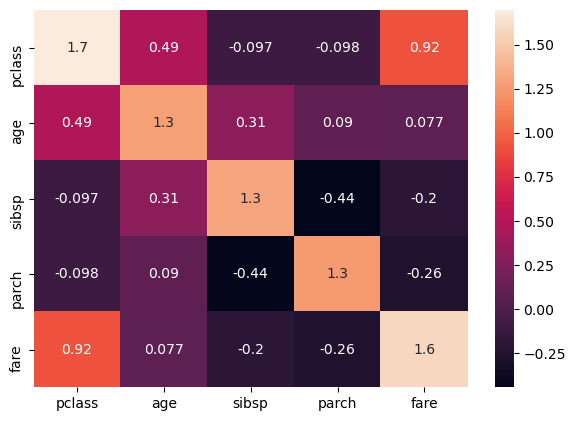

In [38]:
# checking for multicollinearity
# Using the variance Inflation Factor (VIF)

# This is calculated using linear algebra inverse function
plt.figure(dpi = 100, figsize = (7,5))
sns.heatmap(pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns), annot = True)

There are no cases of multicollinearity

### 4.3 Multivariate Analysis

In [39]:
#We will label encode our dataset for regression analysis and model training
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
train1 = train.apply(LabelEncoder().fit_transform)
train1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,52,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,48,1,0,189,2
4,0,2,1,48,0,0,43,2


### Using 80-20 split

In [40]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize, Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [41]:
#Creating our target variable
X = train1.drop(columns = ['survived'])
y = train1['survived']

In [42]:
#Importing the required libraries
from sklearn.model_selection import train_test_split
#splitting the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [43]:
#Standardization of the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Searching the best parameters using Random Search
from sklearn.model_selection import KFold
params = { 'n_neighbors' : range(1,10),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
          
kfold = KFold(n_splits = 5)  # specifying number of folds for cross validation
        
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = kfold,
                       n_jobs = -1)
          
rs = rs.fit(X_train, y_train)
rs.best_params_

{'weights': 'uniform', 'n_neighbors': 6, 'metric': 'euclidean'}

In [45]:
#Creating and fitting our model
# Instantiating our model 
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric = 'manhattan', n_neighbors= 7, weights = 'uniform') 

# Training our model
model.fit(X_train,y_train) 

# Making Predictions using our model 
y_pred = model.predict(X_test) 


In [46]:
# The confusion_matrix and classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[87 18]
 [27 46]]
0.7471910112359551


We achieve an accuracy score of 74.71%

The model is not strong with only 41% accuracy

## 5. Challenging the Solution

### 5.1 Using the 70-30 split

In [47]:
#Splitting the dataset to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
#Standardization of the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#Creating and fitting our model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric = 'manhattan', n_neighbors= 7, weights = 'uniform') 
# Training our model
model.fit(X_train,y_train) 
# Making Predictions using our model 
y_pred = model.predict(X_test) 
# The confusion_matrix and classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[146  16]
 [ 25  80]]
0.846441947565543


We achieve an accuracy score of 80.14%

### 5.2 Using the 60 - 40 Split

In [48]:
#Splitting the dataset to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
#Standardization of the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#Creating and fitting our model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric = 'manhattan', n_neighbors= 7, weights = 'uniform') 
# Training our model
model.fit(X_train,y_train) 
# Making Predictions using our model 
y_pred = model.predict(X_test) 
# The confusion_matrix and classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[200  22]
 [ 34 100]]
0.8426966292134831


We achieve an accuracy score of 83.99%